In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline

Objective is to show how to use tensorflows concatenate() method to augment data.

In [75]:
path_to_file = './augment_example.csv'

"""
The augment_example.csv contains one line consisting of
filepath and target separated by ',':


./1479426526335413494.png, 0.0

"""

"\nThe augment_example.csv contains one line consisting of\nfilepath and target separated by ',':\n\n\n./1479426526335413494.png, 0.0\n\n"

In [76]:
def input_fn(path_to_file, augment=False):
    def _read_csv(line):
        image_path, target = tf.decode_csv(line, list(np.array([""] * 2).reshape(2, 1)))         
        x = tf.to_float(tf.image.decode_image(tf.read_file(image_path)))
        x = x / 255.0
        x.set_shape([480,640,3])
        x = tf.image.resize_image_with_crop_or_pad(
            x,
            150,
            480,
        )
        return {'image': x}, target
        
    def _augment(sample, target):
        x = sample['image']                                
        x = tf.image.flip_left_right(x)
        return {'image': x}, target

    # This is to extract data based on information found in csv.
    # In this example the file 'augment_example.csv' contains info.
    dataset = tf.data.TextLineDataset(path_to_file).map(_read_csv)

    # If augment variable is True, then we augment data per below.
    # Use the concatenate() method to append Dataset object to original data.
    if augment:
        augmented = dataset.map(_augment)
        dataset = dataset.concatenate(augmented)
        
    return dataset


Example where augment variable is set to false. We should expect that only one image is produced which is consistent with the information found in the `augment_example.csv` file.

In [77]:
data = input_fn(path_to_file)

In [78]:
with tf.Session() as sess:
    iterator = data.make_one_shot_iterator()
    next_element = iterator.get_next()
    count = 0
    while True:
        try:
            img, target = sess.run(next_element)
            count+=1
        # Note that try will no throw an exception
        # until the iterator is full consumed.
        except tf.errors.OutOfRangeError:
            break
            
    print("{} image processed".format(count))

1 image processed


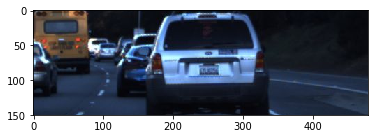

In [79]:
plt.imshow(img['image'])

Now lets try and set the augment variable to True. We should expect 2 images. The original image, and the augmented image. (flip_left_right() was used as its visually easy to confirm difference.)

In [80]:
data = input_fn(path_to_file, augment=True)

with tf.Session() as sess:
    iterator = data.make_one_shot_iterator()
    next_element = iterator.get_next()
    img = {}
    count = 0
    while True:
        try:
            img['img{}'.format(count)], target = sess.run(next_element)
            count+=1
        except tf.errors.OutOfRangeError:
            break
            
    print("{} image processed".format(count))

2 image processed


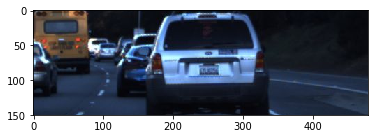

In [81]:
plt.imshow(img['img0']['image'])

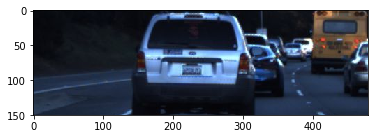

In [74]:
plt.imshow(img['img1']['image'])